In [124]:
import datetime as dt
from datetime import datetime
import sys
import os
import boto3
import pandas as pd
from boto3.session import Session

from io import StringIO
import numpy as np
import shutil

# declaring some constants
bucket = 'arable-adse-dev'
session = Session()
client = session.client('s3')

import json
import psycopg2 as pg
import pandas.io.sql as psql
import warnings
warnings.filterwarnings('ignore')


## import library
import datetime as dt

import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

In [160]:
# get access to production data
client = boto3.client('secretsmanager')
response = client.get_secret_value(SecretId='alp-datasci')
a = json.loads(response['SecretString'])

def get_data_prod(query):
    connection = pg.connect(user = a['alp_user'],
                            password = a['alp_pword'],
                            host = a['alp_host'],
                            port = a['alp_port'],
                            database = a['alp_db'])

    df = psql.read_sql('''%s''' % (query), connection)

    connection.close()
    
    return df


client = boto3.client('secretsmanager')
response = client.get_secret_value(SecretId='han-db')
b = json.loads(response['SecretString'])

def get_data_test(query):    
    connection = pg.connect(user = b['user'],
                            password = b['alt_pword'],
                            host = b['alt_host'],
                            port = b['alt_port'],
                            database = b['alt_db'])

    df = psql.read_sql('''%s''' % (query), connection)

    connection.close()
    
    return df

In [161]:
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
from matplotlib.dates import DateFormatter
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 16})
pylab.rcParams['figure.figsize'] = (15, 8)
pylab.rcParams['agg.path.chunksize'] = 10000
import plotly.graph_objects as go

Populating the interactive namespace from numpy and matplotlib


In [162]:
## ET Bug check

device = 'C006338'
start = '2022-03-31'
end = '2022-07-23'

In [163]:
mark_5min = get_data_prod(f"""
        select c.*
        from device_data.calibrated c
        where c.device = '{device}'
        and time >= '{start}'
        and time <= '{end}'
        """)

In [129]:
mark_5min.columns

Index(['time', 'device', 'location', 'b1dw', 'b1uw', 'b2dw', 'b2uw', 'b3dw',
       'b3uw', 'b4dw', 'b4uw', 'b5dw', 'b5uw', 'b6dw', 'b6uw', 'b7dw', 'b7uw',
       'lwdw', 'lwuw', 'lfw', 'p', 'pardw', 'paruw', 'rh', 'swdw', 'swuw',
       'tabove', 'tair', 'tbelow', 'tdew', 'dqs', 'lat', 'long', 'create_time',
       'tair_version', 'tbelow_version', 'radcal_version', 'update_time'],
      dtype='object')

In [130]:
## hourly data
hourly = get_data_prod(f"""
        select *
        from device_data.hourly
        where device = '{device}'
        and time >= '{start}'
        and time <= '{end}'
        """)

In [131]:
hourly[['time', 'lat','long', 'swdw', 'device', 'et', 'etc','tair','elevation','et_version']]

KeyError: "['elevation'] not in index"

In [132]:
sorted_hourly = hourly.sort_values(by=['time'], ascending=True)
sorted_hourly.columns

Index(['time', 'device', 'location', 'b1dw', 'b1uw', 'b2dw', 'b2uw', 'b3dw',
       'b3uw', 'b4dw', 'b4uw', 'b5dw', 'b5uw', 'b6dw', 'b6uw', 'b7dw', 'b7uw',
       'lwdw', 'lwuw', 'lfw', 'p', 'pardw', 'paruw', 'rh', 'swdw', 'swuw',
       's_dw', 's_uw', 'tabove', 'tair', 'tbelow', 'tdew', 'lat', 'long',
       'precip', 'prate', 'create_time', 'slp', 'precip_version',
       'precip_classifier_version', 'ea', 'mint', 'maxt', 'wind_speed',
       'wind_speed_min', 'wind_speed_max', 'wind_heading', 'wind_direction',
       'etc', 'et', 'rh_at_maxt', 'vpd', 'max_tdew', 'min_rh', 'low_quality',
       'sample_pct', 'et_version', 'update_time'],
      dtype='object')

In [133]:
sorted_hourly[['slp']]

,slp
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2732,NaN
2733,NaN
2734,NaN
2735,NaN


In [134]:
filtered_df =sorted_hourly.loc[sorted_hourly["time"].between('2022-07-15', '2022-07-22')]
filtered_df.reset_index(drop=True)
filtered_df['et_version'].unique

<bound method Series.unique of 2544    backup: penman-monteith
2545    backup: penman-monteith
2546    backup: penman-monteith
2547    backup: penman-monteith
2548    backup: penman-monteith
                 ...           
2708    backup: penman-monteith
2709    backup: penman-monteith
2710    backup: penman-monteith
2711    backup: penman-monteith
2712    backup: penman-monteith
Name: et_version, Length: 169, dtype: object>

In [135]:
daily = get_data_prod(f"""
        select *
        from device_data.daily
        where device = '{device}'
        and time >= '{start}'
        and time <= '{end}'
        """)

In [136]:
daily[['device', 'time', 'et','kc', 'etc']]

,device,time,et,kc,etc
0,C006338,2022-03-31 00:00:00+00:00,0.000000,0.378814,0.000000
1,C006338,2022-04-01 00:00:00+00:00,0.000000,0.344619,0.000000
2,C006338,2022-04-02 00:00:00+00:00,0.140981,0.329930,0.048585
3,C006338,2022-04-03 00:00:00+00:00,0.000000,0.329460,0.000000
4,C006338,2022-04-04 00:00:00+00:00,0.000000,0.326921,0.000000
...,...,...,...,...,...
110,C006338,2022-07-19 00:00:00+00:00,0.000000,0.792976,0.000000
111,C006338,2022-07-20 00:00:00+00:00,0.000000,0.766879,0.000000
112,C006338,2022-07-21 00:00:00+00:00,0.000000,0.785184,0.000000
113,C006338,2022-07-22 00:00:00+00:00,0.000000,0.785825,0.000000


In [137]:
sorted_hourly.loc[sorted_hourly["time"].between('2022-07-15', '2022-07-22')]
daily_filtered = daily.loc[daily['time'].between('2022-07-15', '2022-07-22')]
daily_filtered[['time', 'et','etc']]

,time,et,etc
106,2022-07-15 00:00:00+00:00,0.0,0.0
107,2022-07-16 00:00:00+00:00,0.0,0.0
108,2022-07-17 00:00:00+00:00,0.0,0.0
109,2022-07-18 00:00:00+00:00,0.0,0.0
110,2022-07-19 00:00:00+00:00,0.0,0.0
111,2022-07-20 00:00:00+00:00,0.0,0.0
112,2022-07-21 00:00:00+00:00,0.0,0.0
113,2022-07-22 00:00:00+00:00,0.0,0.0


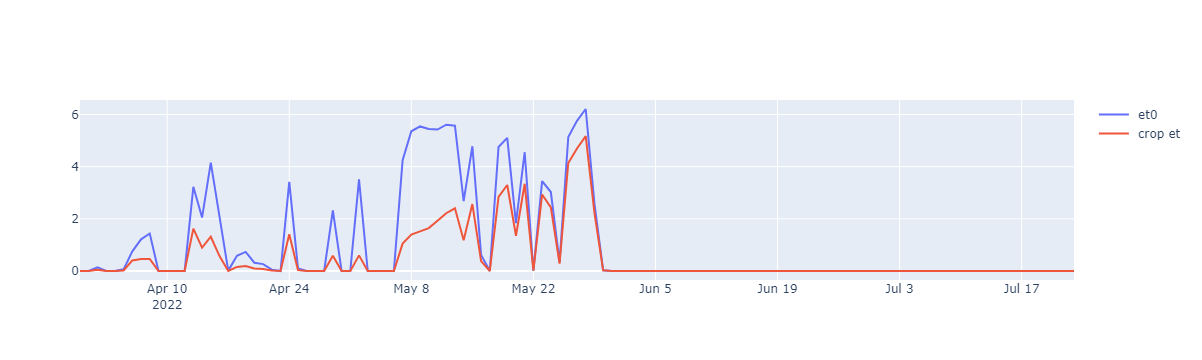

In [138]:
figure = go.FigureWidget(
        data=[
        go.Scatter(
            x=daily["time"],
            y=daily["et"],
            name=" et0 ",
            
        ),
        go.Scatter(
            x=daily["time"],
            y=daily["etc"],
            name=" crop et ",
            
            
        )
       
               
        ]
   
        )
figure.show()

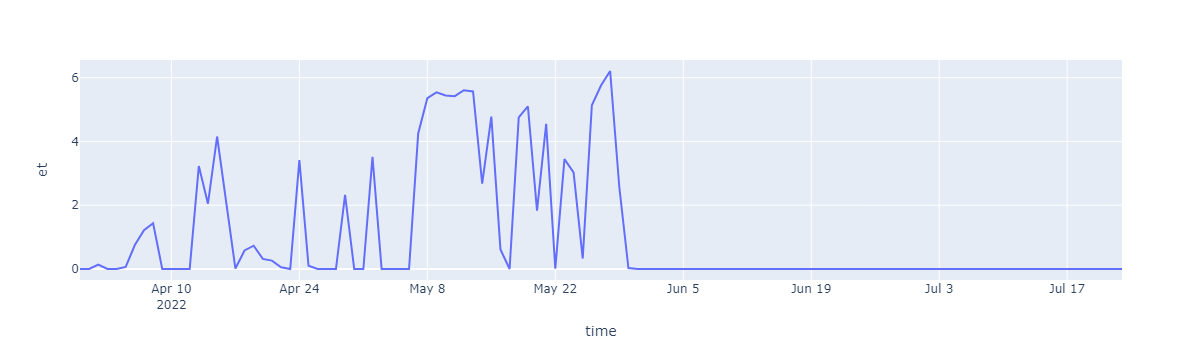

In [139]:
fig = px.line(
    daily, x="time", y="et"
)
fig.show()

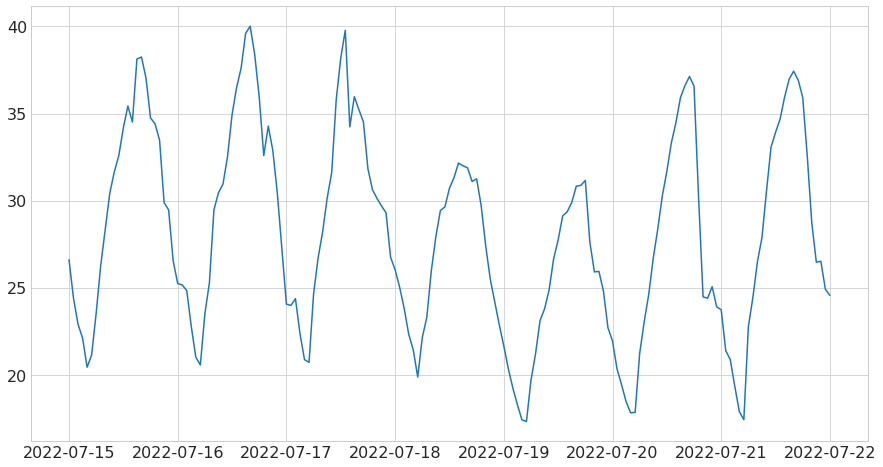

In [140]:
plt.plot(filtered_df['time'], filtered_df['tair'] )

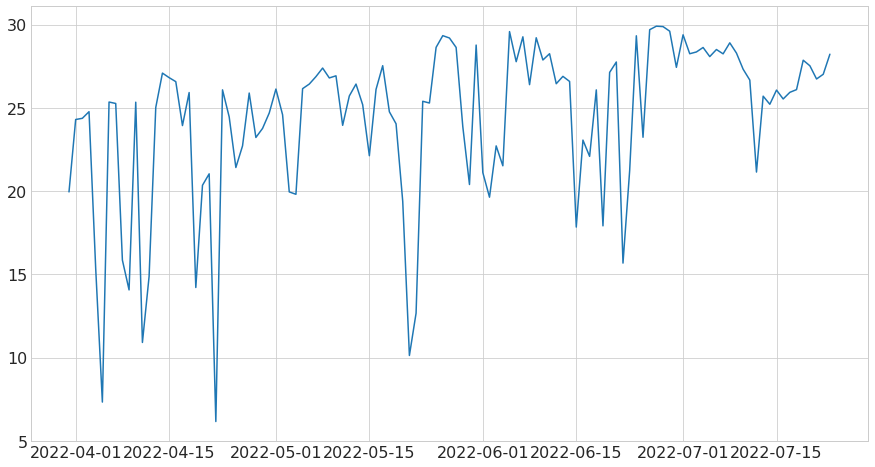

In [141]:
plt.plot(daily['time'], daily['swdw'], label = 'daily' )

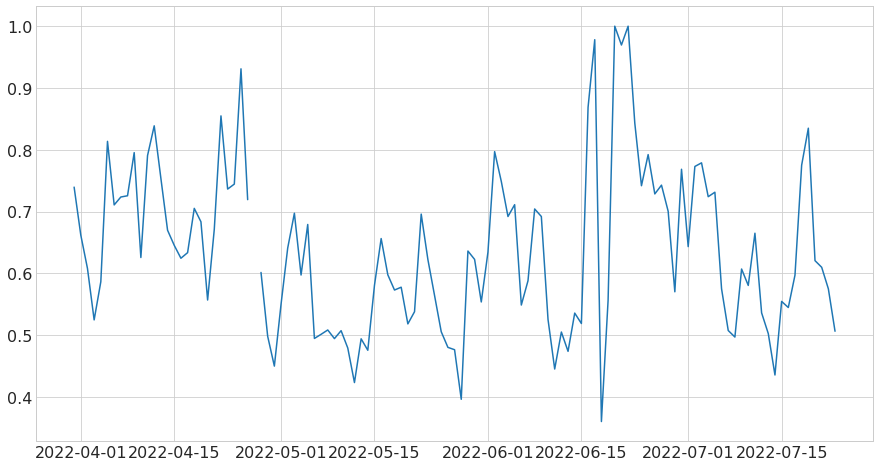

In [142]:
plt.plot(daily['time'], daily['mean_rh'], label = 'daily' )

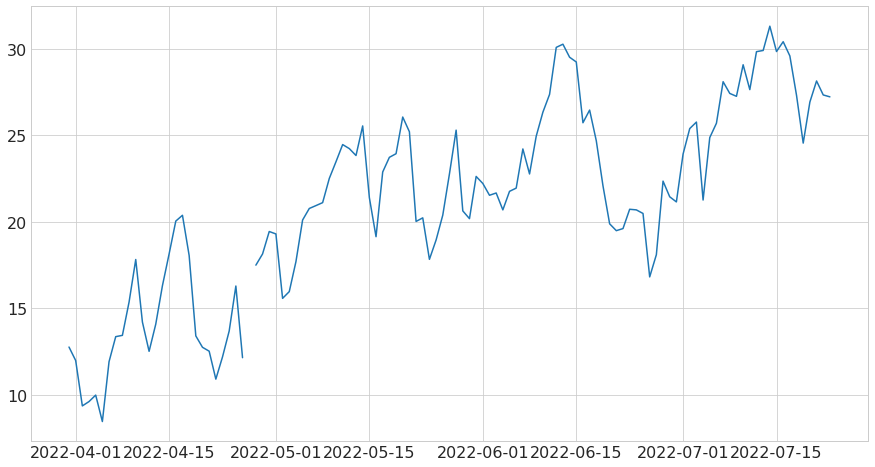

In [143]:
plt.plot(daily['time'], daily['meant'], label = 'daily' )

### pulling data another way

In [144]:
def get_data(table, columns, begin, end, device):
    
#     connection = pg.connect(user = d['username'],
#                             password = d['password'],
#                             host = d['host'],
#                             port = d['port'],
#                             database = d['database'])
    connection = pg.connect(user = d['alp_user'],
                            password = d['alp_pword'],
                            host = d['alp_host'],
                            port = d['alp_port'],
                            database = d['alp_db'])

    df = psql.read_sql(
        "SELECT" + columns + " FROM device_data." + table + " WHERE device = '" + device + "' AND time >= '" + begin +
        "' AND time <= '" + end + "'", connection)

    connection.close()
    
    return df

In [145]:
# use Secrets Manager to grab ALP credentials
client = boto3.client('secretsmanager')
response = client.get_secret_value(SecretId='alp-datasci')
d = json.loads(response['SecretString'])

In [146]:
### get mark data from daily table
device = 'C006338' 
dictionary = {"C006338": ['2022-07-15', '2022-07-20']}
daily = get_data('daily', ' *', dictionary[device][0], dictionary[device][1], device) 

In [147]:
daily[['time', 'device', 'et', 'etc', 'slp', 'ea']]

,time,device,et,etc,slp,ea
0,2022-07-15 00:00:00+00:00,C006338,0.0,0.0,None,2.264245
1,2022-07-16 00:00:00+00:00,C006338,0.0,0.0,None,2.260788
2,2022-07-17 00:00:00+00:00,C006338,0.0,0.0,None,2.425446
3,2022-07-18 00:00:00+00:00,C006338,0.0,0.0,None,2.988560
4,2022-07-19 00:00:00+00:00,C006338,0.0,0.0,None,2.640455
5,2022-07-20 00:00:00+00:00,C006338,0.0,0.0,None,1.992854


In [148]:
### get mark data from daily table
device = 'C006338' 
dictionary = {"C006338": ['2022-07-15', '2022-07-20']}
hourly = get_data('hourly', ' *', dictionary[device][0], dictionary[device][1], device) 

In [149]:
hourly[['time', 'device', 'et', 'etc', 'et_version','slp', 'ea', 'p']]

,time,device,et,etc,et_version,slp,ea,p
0,2022-07-15 00:00:00+00:00,C006338,None,None,backup: penman-monteith,None,1.825037,None
1,2022-07-15 01:00:00+00:00,C006338,None,None,backup: penman-monteith,None,1.749421,None
2,2022-07-15 02:00:00+00:00,C006338,None,None,backup: penman-monteith,None,1.675367,None
3,2022-07-15 03:00:00+00:00,C006338,None,None,backup: penman-monteith,None,1.671145,None
4,2022-07-15 04:00:00+00:00,C006338,None,None,backup: penman-monteith,None,1.800045,None
...,...,...,...,...,...,...,...,...
116,2022-07-19 20:00:00+00:00,C006338,None,None,backup: penman-monteith,None,3.336493,None
117,2022-07-19 21:00:00+00:00,C006338,None,None,backup: penman-monteith,None,3.215144,None
118,2022-07-19 22:00:00+00:00,C006338,None,None,backup: penman-monteith,None,2.939506,None
119,2022-07-19 23:00:00+00:00,C006338,None,None,backup: penman-monteith,None,2.075920,None


In [150]:
### get mark data from daily table
device = 'C006447' 
dictionary = {"C006447": ['2022-07-01', '2022-07-25']}
hourly = get_data('hourly', '*',dictionary[device][0], dictionary[device][1], device) 

In [151]:
hourly

,time,device,location,b1dw,b1uw,b2dw,b2uw,b3dw,b3uw,b4dw,...,etc,et,rh_at_maxt,vpd,max_tdew,min_rh,low_quality,sample_pct,et_version,update_time
0,2022-07-01 00:00:00+00:00,C006447,628f372abb297600100155e6,0.002754,0.002111,0.001272,0.000899,0.001885,0.001229,0.000845,...,0.003280,0.004333,0.6530,0.682993,11.870584,0.6514,True,0.92,20210128_1,2022-07-21 21:35:13+00
1,2022-07-01 01:00:00+00:00,C006447,628f372abb297600100155e6,0.002603,0.002097,0.001216,0.000902,0.001863,0.001243,0.000847,...,0.009462,0.012500,0.6935,0.592125,11.477190,0.6877,True,0.92,20210128_1,2022-07-21 21:35:18+00
2,2022-07-01 02:00:00+00:00,C006447,628f372abb297600100155e6,0.002610,0.001979,0.001226,0.000889,0.001874,0.001195,0.000839,...,0.004794,0.006333,0.7090,0.503244,11.313962,0.7078,True,0.92,20210128_1,2022-07-21 21:35:23+00
3,2022-07-01 03:00:00+00:00,C006447,628f372abb297600100155e6,0.002781,0.002111,0.001190,0.000852,0.001744,0.001122,0.000805,...,0.001514,0.002000,0.7215,0.443819,11.376325,0.7215,True,1.00,20210128_1,2022-07-21 21:35:28+00
4,2022-07-01 04:00:00+00:00,C006447,628f372abb297600100155e6,0.002552,0.001996,0.001330,0.000798,0.001770,0.001100,0.000902,...,0.000757,0.001000,0.7747,0.330525,10.787928,0.7729,True,1.00,20210128_1,2022-07-21 21:35:32+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,2022-07-24 20:00:00+00:00,C006447,628f372abb297600100155e6,0.003697,0.002522,0.001636,0.001084,0.002471,0.001551,0.001131,...,0.034895,0.063583,0.3415,2.648912,14.855125,0.3415,False,1.00,20210128_1,2022-07-24 21:15:56+00
573,2022-07-24 21:00:00+00:00,C006447,628f372abb297600100155e6,0.003549,0.002464,0.001649,0.001004,0.002336,0.001558,0.001076,...,0.029269,0.053333,0.3922,2.368199,14.788747,0.3914,False,0.92,20210128_1,2022-07-24 22:16:42+00
574,2022-07-24 22:00:00+00:00,C006447,628f372abb297600100155e6,0.003593,0.002354,0.001587,0.000965,0.002347,0.001486,0.001069,...,0.022821,0.041583,0.4023,2.160855,14.240638,0.4023,False,1.00,20210128_1,2022-07-24 23:16:24+00
575,2022-07-24 23:00:00+00:00,C006447,628f372abb297600100155e6,0.003684,0.002475,0.001615,0.001002,0.002342,0.001521,0.001067,...,0.011205,0.020417,0.4331,2.066390,14.373183,0.4279,False,1.00,20210128_1,2022-07-25 00:16:00+00


In [152]:
# stuff for ET

SUN = 1367.0  # Solar Constant W/m2
SBC = 5.67e-8  # Stefan-Boltzman Const
seconds_per_day = 86400.
# below was taken from adam - don't know what it is
eot = np.array([
-3.4, -3.9, -4.4, -4.8, -5.3, -5.7, -6.2, -6.6, -7.0, -7.4, -7.8, -8.2, -8.6, -8.9, -9.3, -9.7, -10.0, -10.3, -10.6, -10.9, -11.2, -11.5, -11.8, -12.0, -12.2, -12.5, -12.7, -12.9, -13.1, -13.2, -13.4, -13.5, -13.7, -13.8, -13.9, -14.0, -14.0, -14.1, -14.1, -14.2, -14.2, -14.2, -14.2, -14.2, -14.2, -14.1, -14.1, -14.0, -13.9, -13.8, -13.7, -13.6, -13.5, -13.4, -13.2, -13.1, -12.9, -12.7, -12.6, -12.4, -12.2, -12.0, -11.8, -11.5, -11.3, -11.1, -10.8, -10.6, -10.3, -10.1, -9.8, -9.5, -9.3, -9.0, -8.7, -8.4, -8.1, -7.8, -7.5, -7.2, -6.9, -6.6, -6.3, -6.0, -5.7, -5.4, -5.1, -4.8, -4.5, -4.2, -3.9, -3.7, -3.4, -3.1, -2.8, -2.5, -2.2, -1.9, -1.7, -1.4, -1.1, -0.8, -0.6, -0.3, -0.1, 0.1, 0.4, 0.6, 0.8, 1.0, 1.3, 1.5, 1.6, 1.8, 2.0, 2.2, 2.3, 2.5, 2.6, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.4, 3.5, 3.6, 3.6, 3.6, 3.7, 3.7, 3.7, 3.7, 3.7, 3.6, 3.6, 3.6, 3.5, 3.4, 3.4, 3.3, 3.2, 3.1, 3.0, 2.9, 2.8, 2.6, 2.5, 2.4, 2.2, 2.1, 1.9, 1.7, 1.6, 1.4, 1.2, 1.0, 0.8, 0.6, 0.4, 0.2, 0.0, -0.2, -0.4, -0.6, -0.8, -1.1, -1.3, -1.5, -1.7, -1.9, -2.1, -2.4, -2.6, -2.8, -3.0, -3.2, -3.4, -3.6, -3.8, -4.0, -4.2, -4.4, -4.5, -4.7, -4.9, -5.0, -5.2, -5.3, -5.5, -5.6, -5.7, -5.8, -5.9, -6.0, -6.1, -6.2, -6.3, -6.3, -6.4, -6.4, -6.5, -6.5, -6.5, -6.5, -6.5, -6.5, -6.5, -6.5, -6.4, -6.4, -6.3, -6.2, -6.1, -6.0, -5.9, -5.8, -5.7, -5.5, -5.4, -5.2, -5.1, -4.9, -4.7, -4.5, -4.3, -4.1, -3.9, -3.7, -3.4, -3.2, -3.0, -2.7, -2.4, -2.2, -1.9, -1.6, -1.3, -1.0, -0.7, -0.4, -0.1, 0.2, 0.6, 0.9, 1.2, 1.6, 1.9, 2.2, 2.6, 2.9, 3.3, 3.6, 4.0, 4.3, 4.7, 5.1, 5.4, 5.8, 6.1, 6.5, 6.8, 7.2, 7.5, 7.9, 8.2, 8.6, 8.9, 9.3, 9.6, 9.9, 10.2, 10.6, 10.9, 11.2, 11.5, 11.8, 12.1, 12.4, 12.7, 12.9, 13.2, 13.5, 13.7, 13.9, 14.2, 14.4, 14.6, 14.8, 15.0, 15.2, 15.3, 15.5, 15.6, 15.8, 15.9, 16.0, 16.1, 16.2, 16.3, 16.3, 16.4, 16.4, 16.4, 16.4, 16.4, 16.4, 16.4, 16.3, 16.3, 16.2, 16.1, 16.0, 15.9, 15.8, 15.6, 15.5, 15.3, 15.1, 14.9, 14.7, 14.4, 14.2, 13.9, 13.7, 13.4, 13.1, 12.8, 12.5, 12.1, 11.8, 11.4, 11.1, 10.7, 10.3, 9.9, 9.5, 9.1, 8.7, 8.2, 7.8, 7.4, 6.9, 6.4, 6.0, 5.5, 5.0, 4.5, 4.0, 3.6, 3.1, 2.6, 2.1, 1.6, 1.1, 0.6, 0.1, -0.4, -0.9, -1.4, -1.9, -2.4, -2.9, -3.1  # NOQA
])


def esat_(xT):  # pragma: no cover
    """ saturation vapor pressure: kPa
        return 0.611*exp(17.27*xT/(xT+237)) # Monteith formulation
    :param xT:
    :return:
    """
    return (617.4 + 42.22 * xT + 1.675 * xT ** 2 + 0.01408 * xT ** 3 +
            0.0005818 * xT ** 4) / 1000  # Paw U formulation


def ea_(xT, xRH):  # pragma: no cover
    """ vapor pressure: kPa
    :param xT:
    :param xRH:
    :return:
    """
    return esat_(xT) * xRH


def VPD_(xT, xRH):  # pragma: no cover
    """ vapor pressure deficit: kPa
    :param xT:
    :param xRH:
    :return:
    """
    return esat_(xT) * (1.0 - xRH)


def solar_utc_offset_(xDatetime, xLon):  # pragma: no cover
    """ difference between solar time and utc time, in fractions of a day
    :param xDatetime:
    :param xLon:
    :return:
    """

    dayfrac = ((xDatetime.dt.hour) * 3600. + (xDatetime.dt.minute) * 60 + xDatetime.dt.second) / seconds_per_day
    # fractions of day, ranging from -0.5 to +0.5
    solar_utc_offset = xLon / 360.0 + eot[xDatetime.dt.dayofyear - 1] / 1440.

    return dayfrac + solar_utc_offset


def solar_theta_(xDatetime, xLon):  # pragma: no cover
    """ hour angle, the fraction of a full rotation has turned after local solar noon
        cos(theta) is 1 at solar noon
    :param xDatetime:
    :param xLon:
    :return:
    """

    solar_utc_offset = solar_utc_offset_(xDatetime, xLon) - 0.5

    theta0 = (solar_utc_offset - 1)*(solar_utc_offset >= 1)
    theta1 = solar_utc_offset*((solar_utc_offset >= 0) & (solar_utc_offset < 1))
    theta2 = (solar_utc_offset + 1)*(solar_utc_offset < 0)
    theta = theta0 + theta1 + theta2

    return 2 * pi * theta


def solar_delta_(xDatetime, xLon):  # pragma: no cover
    """ declination angle, varying over the year
    :param xDatetime:
    :return:
    """
    tropic = 23.45 * pi / 180.0
    leap = (xDatetime.dt.year % 4 == 0) | (xDatetime.dt.year % 100 == 0)
    yearl = 365. + leap
    equinox = 173. + leap
    solar_utc_offset = solar_utc_offset_(xDatetime, xLon)
    fdoy = (xDatetime.dt.dayofyear - equinox + solar_utc_offset) / yearl  # fractions of year
    return tropic * cos(2.0 * pi * fdoy)


def solar_phi_(xLat):  # pragma: no cover
    """ Latitude in radians pi/2 at the poles, 0 at the equator
    :param xLat - Latitude (decimal degree):
    :return:
    """
    return xLat * pi / 180.0


def solar_psi_(xDatetime, xLat, xLon):  # pragma: no cover
    """ solar zenith angle (0 overhead, pi/2 at horizon)
        typically, allowed to go 9 deg below the horizon
    :param xDatetime:
    :param xLat:
    :param xLon:
    :return:
    """
    phi = solar_phi_(xLat)
    delta = solar_delta_(xDatetime, xLon)
    theta = solar_theta_(xDatetime, xLon)
    psi = arccos(sin(phi) * sin(delta) + cos(phi) * cos(delta) * cos(theta))
    return psi


def SWP_(xDatetime, xLat, xLon):

    psi = solar_psi_(xDatetime, xLat, xLon)
    # etrn = SUN * erv_(xDatetime)  # this is not used while ERV is not tested
    etr0 = 0 * (cos(psi) < 0)
    etr1 = SUN * cos(psi) * (cos(psi) >= 0)

    return etr0 + etr1

def Tk_(xT):  # pragma: no cover
    """
    :param xT:
    :return:
    """
    return xT + 273.2


def Rn_Dong92(df):
    """
    Calculate net radiation (Rn) (Dong et al., 1992)
    """
    
    # Temperatures
    Tk = Tk_(df.tair)
    To = Tk_(df.tair)  # clear sky temp
    Tc = Tk_(df.tair)  # cloud top temp
    Ts = Tk_(df.tair)  # surface temp; per Dong p472 set to air temp at 1.5m

    sza = solar_psi_(df.time, df.lat, df.long)
    theta = 90. - sza * 180. / np.pi  # solar altitude in degrees, cf Dong eqn 15

    # Irradiance, Dong eqn 5
    I = df.swp

    # use our swdw/swuw
    alpha = (-1.0 * df.swuw) / df.swdw
    alpha = alpha.clip(0, 0.5)

    # emissivity
    epss = 0.98  # surface emissivity. Dong assumes 0.98, but CIMIS uses 1.

    # clear sky emissivity, Dong eqn 10
    # ea is in mbar in this eqn
    epso = 1.08 * (1.0 - np.exp(-(df.ea * 10.) ** (Tk/2016.)))

    # fraction of cloud cover
    Ra = (0.79 - 3.75 / theta) * I
    Ra[theta < 10] = (0.79 - 3.75 / 10.) * I  # handles low zenith angles
    ratio = df.swdw / Ra
    ratio[ratio > 2] = np.nan
    ratio = ratio.clip(0, 1)
    c = (1.333 - 1.333 * (ratio)) ** 0.294
    c = np.clip(c, 0, 1)

    # Rn, equation 19 p 477
    E = 0.89
    # fix parenthesis error
    Rn = E * ((1-alpha) * df.swdw + epso * (1.-c) * SBC * (To ** 4) + c * SBC * (Tc ** 4) - epss * SBC * (Ts ** 4))

    return Rn


def calc_eto_mm_5min(df):
    """
    method to calculate crop ET (ETc) using the FAO Penman-Monteith
    equation that integrates NDVI derived crop coefficient measured
    by spectrometer.
    validated against Woodland and Esparto CIMIS stations May, 2017
    :param df: data frame of 5min data
    :return: ETo 5min (mm/5min)
    """

    # check for missing values
    if not pd.Series(['time', 'lat', 'long', 'swp', 'ea', 'vpd', 'swdw', 'swuw', 'tair', 'p']).isin(df).all():
        return np.nan
    
    u = 2 # default wind speed recommended by Rick Allen (m/s)

    # use Dong version of net radiation
    rn = Rn_Dong92(df) * 300 / 1000000  # Net radiation (MJ m-2 5min-1)  # NOQA

    gamma = 0.000665 * df.p  # psychrometric constant (kPa C-1)
    # delta = slope of saturation vapor pressure curve
    # the seemingly extraneous parens are necessary...do not remove
    delta = 4098 * (0.6108 * np.exp((17.27 * df.tair) / (df.tair + 237.3)) / ((df.tair + 237.3) ** 2))  # NOQA

    eto_mm_5min = ((0.408 * delta * rn) + (
        gamma * (3.125 / (df.tair + 273)) * u * df.vpd)) / (
            delta + (gamma * (1 + 0.34 * u)))  # mm/5min

    # do NOT clip to 0 based on Adam's recommendation
    return eto_mm_5min

In [153]:
#mark_5min[['time', 'lat', 'long', 'swp', 'ea', 'vpd', 'swdw', 'swuw', 'tair', 'p']]



In [154]:
#Calculate required but missing features (swp, ea, vpd) using functions

mark_5min['swp'] = SWP_(mark_5min['time'], mark_5min['lat'],mark_5min['long'])
mark_5min['ea'] =  ea_(mark_5min['tair'],mark_5min['rh'] )
mark_5min['vpd'] = VPD_(mark_5min['tair'],mark_5min['rh'] )
mark_5min['wind_speed'] = 2
mark_5min['wind_speed']

0        2
1        2
2        2
3        2
4        2
        ..
32195    2
32196    2
32197    2
32198    2
32199    2
Name: wind_speed, Length: 32200, dtype: int64

In [155]:
mark_5min['et']= calc_eto_mm_5min(mark_5min )

In [156]:
mark_5min['et']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
32195   NaN
32196   NaN
32197   NaN
32198   NaN
32199   NaN
Name: et, Length: 32200, dtype: float64

In [167]:
!pwd

/home/ec2-user/SageMaker/data-check


In [164]:
import sys
sys.path.append('/home/ec2-user/SageMaker/adse/lib')

In [165]:
from graph_utilities  import*

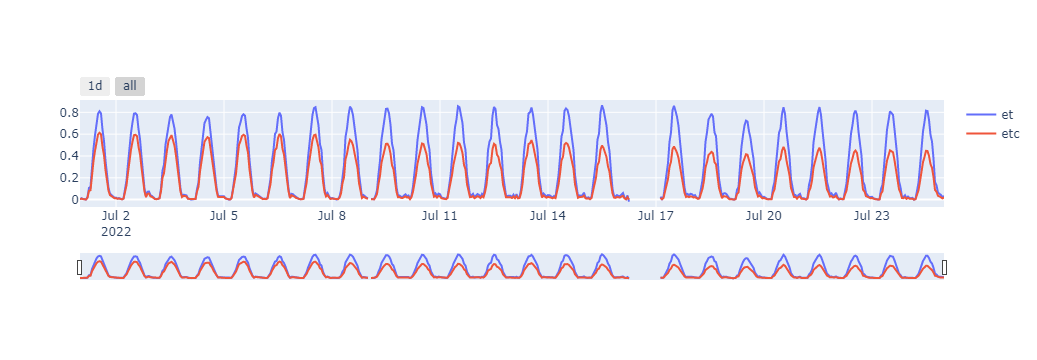

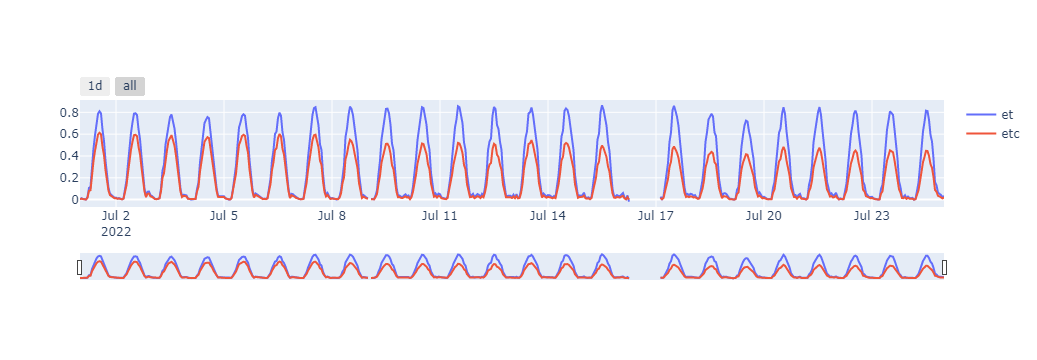

In [166]:
plot_time_series(hourly,'time', 'et', var_col2 = 'etc')